# Trajectory Residual Histos
- For FMS Meeting #54 

## Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import pickle as pkl
import os
from sys import getsizeof
import re
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
from plotly.offline import iplot, plot

In [5]:
init_notebook_mode(True)

In [6]:
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from hallprobecalib.hpcplots import scatter2d, scatter3d, histo

## Test 1: Brute Force Query

In [7]:
df_traj = pkl.load(open(mu2e_ext_path+'trajectory/positions.run03.df.data.p','rb'))

In [8]:
df_traj['X'] = df_traj['X'] / 1e3
df_traj['Y'] = df_traj['Y'] / 1e3
df_traj['Z'] = df_traj['Z'] / 1e3

In [9]:
df_ds = DataFrameMaker(mu2e_ext_path+'datafiles/Mau13/Mu2e_DSMap_V13',input_type='pkl').data_frame

In [10]:
df_ds = df_ds.query("R<.700 and 4.000<Z<12.000")
df_ds = df_ds.reset_index(drop=True)

In [11]:
len(df_ds)

783680

In [24]:
df_ds.set_index(['X','Y','Z'],inplace=True)

In [25]:
df_ds

Bx           By           Bz         R       Phi  \
X    Y    Z                                                                   
-1.2 -1.2 3.071   1284.125788  1307.100001   442.195248  1.697056 -2.356194   
          3.096   1312.127380  1335.143291   410.874370  1.697056 -2.356194   
          3.121   1339.646202  1362.701661   376.958648  1.697056 -2.356194   
          3.146   1366.531533  1389.624290   340.379319  1.697056 -2.356194   
          3.171   1392.610688  1415.737061   301.071838  1.697056 -2.356194   
          3.196   1417.712919  1440.869717   259.006070  1.697056 -2.356194   
          3.221   1441.647134  1464.830327   214.162686  1.697056 -2.356194   
          3.246   1464.214992  1487.420014   166.550010  1.697056 -2.356194   
          3.271   1485.210587  1508.432309   116.204671  1.697056 -2.356194   
          3.296   1504.423011  1527.655724    63.194692  1.697056 -2.356194   
          3.321   1521.639452  1544.876854     7.622175  1.697056 -2.356194   
          3.346   1536.648861  1559.884050   -50.374651  1.697056 -2.356194   
          3.371   1549.246140  1572.471613  -110.620119  1.697056 -2.356194   
          3.396   1559.236492  1582.444159  -172.900973  1.697056 -2.356194   
          3.421   1566.440182  1589.621382  -236.967249  1.697056 -2.356194   
          3.446   1570.697195  1593.842731  -302.534533  1.697056 -2.356194   
          3.471   1571.871690  1594.971867  -369.287518  1.697056 -2.356194   
          3.496   1569.855992  1592.900668  -436.884873  1.697056 -2.356194   
          3.521   1564.573887  1587.552538  -504.965259  1.697056 -2.356194   
          3.546   1555.983012  1578.884806  -573.154267  1.697056 -2.356194   
          3.571   1544.076197  1566.890060  -641.071993  1.697056 -2.356194   
          3.596   1528.881624  1551.596336  -708.340855  1.697056 -2.356194   
          3.621   1510.461838  1533.066128  -774.593283  1.697056 -2.356194   
          3.646   1488.911654  1511.394278  -839.478904  1.697056 -2.356194   
          3.671   1464.355066  1486.704908  -902.670875  1.697056 -2.356194   
          3.696   1436.941388  1459.147558  -963.871092  1.697056 -2.356194   
          3.721   1406.840857  1428.892764 -1022.814108  1.697056 -2.356194   
          3.746   1374.241124  1396.128740 -1079.268255  1.697056 -2.356194   
          3.771   1339.336409  1361.049675 -1133.043781  1.697056 -2.356194   
          3.796   1302.335028  1323.864922 -1183.978742  1.697056 -2.356194   
...                       ...          ...          ...       ...       ...   
 1.2  1.2 15.346   366.346083   364.318760   462.798991  1.697056  0.785398   
          15.371   357.668301   355.720922   459.147989  1.697056  0.785398   
          15.396   349.215961   347.346440   455.415213  1.697056  0.785398   
          15.421   340.983607   339.189901   451.609926  1.697056  0.785398   
          15.446   332.965830   331.245943   447.740768  1.697056  0.785398   
          15.471   325.157283   323.509263   443.815796  1.697056  0.785398   
          15.496   317.552688   315.974627   439.842518  1.697056  0.785398   
          15.521   310.146842   308.636879   435.827932  1.697056  0.785398   
          15.546   302.934627   301.490941   431.778550  1.697056  0.785398   
          15.571   295.911008   294.531825   427.700436  1.697056  0.785398   
          15.596   289.071045   287.754632   423.599231  1.697056  0.785398   
          15.621   282.409890   281.154557   419.480178  1.697056  0.785398   
          15.646   275.922796   274.726893   415.348148  1.697056  0.785398   
          15.671   269.605110   268.467029   411.207665  1.697056  0.785398   
          15.696   263.452283   262.370457   407.062926  1.697056  0.785398   
          15.721   257.459867   256.432767   402.917822  1.697056  0.785398   
          15.746   251.623514   250.649651   398.775955  1.697056  0.785398   
          15.771   245.938980   245.016903   394.640663  1.697056  0.785398  

In [33]:
_ =df_ds.iloc[df_ds.index.get_level_values('X')== np.float(-1.2)]#.iloc[df_ds.index.get_level_values('Y')== np.float(-1.2)]

In [32]:
(df_ds.iloc[df_ds.index.get_level_values('X')== np.float(-1.2)]).iloc[df_ds.index.get_level_values('Y')== np.float(-1.2)]

IndexError: indices are out-of-bounds

In [34]:
_.iloc[_.index.get_level_values('Y')== np.float(-1.2)]

Bx           By           Bz         R       Phi  \
X    Y    Z                                                                   
-1.2 -1.2 3.071   1284.125788  1307.100001   442.195248  1.697056 -2.356194   
          3.096   1312.127380  1335.143291   410.874370  1.697056 -2.356194   
          3.121   1339.646202  1362.701661   376.958648  1.697056 -2.356194   
          3.146   1366.531533  1389.624290   340.379319  1.697056 -2.356194   
          3.171   1392.610688  1415.737061   301.071838  1.697056 -2.356194   
          3.196   1417.712919  1440.869717   259.006070  1.697056 -2.356194   
          3.221   1441.647134  1464.830327   214.162686  1.697056 -2.356194   
          3.246   1464.214992  1487.420014   166.550010  1.697056 -2.356194   
          3.271   1485.210587  1508.432309   116.204671  1.697056 -2.356194   
          3.296   1504.423011  1527.655724    63.194692  1.697056 -2.356194   
          3.321   1521.639452  1544.876854     7.622175  1.697056 -2.356194   
          3.346   1536.648861  1559.884050   -50.374651  1.697056 -2.356194   
          3.371   1549.246140  1572.471613  -110.620119  1.697056 -2.356194   
          3.396   1559.236492  1582.444159  -172.900973  1.697056 -2.356194   
          3.421   1566.440182  1589.621382  -236.967249  1.697056 -2.356194   
          3.446   1570.697195  1593.842731  -302.534533  1.697056 -2.356194   
          3.471   1571.871690  1594.971867  -369.287518  1.697056 -2.356194   
          3.496   1569.855992  1592.900668  -436.884873  1.697056 -2.356194   
          3.521   1564.573887  1587.552538  -504.965259  1.697056 -2.356194   
          3.546   1555.983012  1578.884806  -573.154267  1.697056 -2.356194   
          3.571   1544.076197  1566.890060  -641.071993  1.697056 -2.356194   
          3.596   1528.881624  1551.596336  -708.340855  1.697056 -2.356194   
          3.621   1510.461838  1533.066128  -774.593283  1.697056 -2.356194   
          3.646   1488.911654  1511.394278  -839.478904  1.697056 -2.356194   
          3.671   1464.355066  1486.704908  -902.670875  1.697056 -2.356194   
          3.696   1436.941388  1459.147558  -963.871092  1.697056 -2.356194   
          3.721   1406.840857  1428.892764 -1022.814108  1.697056 -2.356194   
          3.746   1374.241124  1396.128740 -1079.268255  1.697056 -2.356194   
          3.771   1339.336409  1361.049675 -1133.043781  1.697056 -2.356194   
          3.796   1302.335028  1323.864922 -1183.978742  1.697056 -2.356194   
...                       ...          ...          ...       ...       ...   
          15.346  -367.841618  -368.289277   468.599050  1.697056 -2.356194   
          15.371  -359.133638  -359.542480   464.787512  1.697056 -2.356194   
          15.396  -350.654093  -351.025192   460.898110  1.697056 -2.356194   
          15.421  -342.397315  -342.731723   456.940066  1.697056 -2.356194   
          15.446  -334.357705  -334.656447   452.921974  1.697056 -2.356194   
          15.471  -326.529732  -326.793808   448.851837  1.697056 -2.356194   
          15.496  -318.907947  -319.138335   444.737108  1.697056 -2.356194   
          15.521  -311.486988  -311.684640   440.584720  1.697056 -2.356194   
          15.546  -304.261587  -304.427431   436.401124  1.697056 -2.356194   
          15.571  -297.226571  -297.361512   432.192317  1.697056 -2.356194   
          15.596  -290.376866  -290.481787   427.963869  1.697056 -2.356194   
          15.621  -283.707504  -283.783265   423.720954  1.697056 -2.356194   
          15.646  -277.213620  -277.261058   419.468373  1.697056 -2.356194   
          15.671  -270.890456  -270.910387   415.210575  1.697056 -2.356194   
          15.696  -264.733362  -264.726580   410.951686  1.697056 -2.356194   
          15.721  -258.737795  -258.705074   406.695523  1.697056 -2.356194   
          15.746  -252.899320  -252.841413   402.445618  1.697056 -2.356194   
          15.771  -247.213609  -247.131251   398.205233  1.697056 -2.356194  

In [12]:
from mu2e.tools.modeleval import get_mag_field_function

<IPython.core.display.Javascript object>

In [13]:
mag_full_reco_func = get_mag_field_function('Mau13traj')#,fastcart=True)

recreating fit with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=10, ms_c1=50, ns_c1=4, length2=0, ms_c2=0, ns_c2=0, ks_dict={'k3': 10000}, bs_tuples=None, bs_bounds=None, version=1000)
Elapsed time was 1.15313 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 0
    # data points      = 46560
    # variables        = 0
    chi-square         = 764307.395
    reduced chi-square = 16.4155368
    Akaike info crit   = 130285.508
    Bayesian info crit = 130285.508
[[Variables]]
    pitch1:    0 (fixed)
    ms_h1:     0 (fixed)
    ns_h1:     0 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   10 (fixed)
    ms_c1:     50 (fixed)
    ns_c1:     4 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ac1_0_0:  -74613.8 (fixed)
    Bc1_0_0:   13334 (fixed)
    Dc1_0:     0.9452835 (fixed)
    Ac1_0_1:  -439.0484 (fixed)
    Bc1_0_

In [14]:
x_ds = df_ds.X.unique()
y_ds = df_ds.Y.unique()
z_ds = df_ds.Z.unique()

In [15]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [16]:
x_ds_traj = np.array([find_nearest(x_ds, row.X) for row in df_traj.itertuples()])
y_ds_traj = np.array([find_nearest(y_ds, row.Y) for row in df_traj.itertuples()])
z_ds_traj = np.array([find_nearest(z_ds, row.Z) for row in df_traj.itertuples()])

In [17]:
%time df_ds.query(f'X == {x_ds_traj[0]} and Y == {y_ds_traj[0]} and Z == {z_ds_traj[0]}')

CPU times: user 15.4 ms, sys: 15.9 ms, total: 31.2 ms
Wall time: 8.37 ms


,X,Y,Z,Bx,By,Bz,R,Phi,Bphi,Br
374795,-0.025,0.05,5.896,-28.264143,61.020546,14807.011099,0.055902,2.034444,-2.009,67.218544


In [18]:
%time df_ds[(df_ds.X == x_ds_traj[0]) & (df_ds.Y == y_ds_traj[0]) & (df_ds.Z == z_ds_traj[0])]

CPU times: user 5.18 ms, sys: 350 µs, total: 5.53 ms
Wall time: 5.03 ms


,X,Y,Z,Bx,By,Bz,R,Phi,Bphi,Br
374795,-0.025,0.05,5.896,-28.264143,61.020546,14807.011099,0.055902,2.034444,-2.009,67.218544


In [19]:
df_traj['X_check'] = pd.Series(x_ds_traj)
df_traj['Y_check'] = pd.Series(y_ds_traj)
df_traj['Z_check'] = pd.Series(z_ds_traj)

In [20]:
bbx = []
bby = []
bbz = []
for row in df_traj.itertuples():
    #r = row.R
    #phi = row.Phi
    #z = row.Z
    x = row.X
    y = row.Y
    z = row.Z
    bx,by,bz = mag_full_reco_func(x,y,z,cart=True)
    bbx.append(bx)
    bby.append(by)
    bbz.append(bz)

In [21]:
df_traj['BX_fit'] = bbx
df_traj['BY_fit'] = bby
df_traj['BZ_fit'] = bbz

In [23]:
bx, by, bz = mag_full_reco_func(df_traj.X_check,df_traj.Y_check,df_traj.Z_check,cart=True)

In [24]:
df_traj['BX_fit2'] = bx
df_traj['BY_fit2'] = by
df_traj['BZ_fit2'] = bz

In [47]:
# BAD
'''
bbx = []
bby = []
bbz = []

for row in df_traj.itertuples():
    d = df_ds.loc[(df_ds.X == row.X_check) & (df_ds.Y == row.Y_check) & (df_ds.Z == row.Z_check)]
    bbx.append(d.Bx)
    bby.append(d.By)
    bbz.append(d.Bz)

df_traj['Bx'] = bbx
df_traj['By'] = bby
df_traj['Bz'] = bbz
'''

"\nbbx = []\nbby = []\nbbz = []\n\nfor row in df_traj.itertuples():\n    d = df_ds.loc[(df_ds.X == row.X_check) & (df_ds.Y == row.Y_check) & (df_ds.Z == row.Z_check)]\n    bbx.append(d.Bx)\n    bby.append(d.By)\n    bbz.append(d.Bz)\n\ndf_traj['Bx'] = bbx\ndf_traj['By'] = bby\ndf_traj['Bz'] = bbz\n"

In [43]:
df_traj

,X,Y,Z,Vx,Vy,Vz,time,event,E0,EF,run,particle,R,X_check,Y_check,Z_check,BX_fit,BY_fit,BZ_fit
0,-0.014648,0.037617,5.899978,1.348208e+11,2.642890e+11,4.298951e+10,0.000000e+00,0,105.001243,109.435210,3,0,40.367786,-0.025,-0.025,-0.025,-9.257831,30.364508,14796.624514
1,-0.002870,0.064835,5.904275,1.003692e+11,2.792039e+11,4.294855e+10,1.000250e-10,0,105.001243,109.435210,3,0,64.897984,0.000,0.000,0.000,0.136055,33.095908,14785.281151
2,0.005379,0.093322,5.908570,6.435369e+10,2.896360e+11,4.292968e+10,2.000500e-10,0,105.001243,109.435210,3,0,93.476593,0.000,0.000,0.000,3.034925,33.384708,14773.925886
3,0.009971,0.122622,5.912864,2.735427e+10,2.954362e+11,4.292513e+10,3.000750e-10,0,105.001243,109.435210,3,0,123.026417,0.000,0.000,0.000,3.563980,33.424299,14762.568305
4,0.010838,0.152267,5.917158,-1.003543e+10,2.965293e+11,4.293120e+10,4.001000e-10,0,105.001243,109.435210,3,0,152.651929,0.000,0.000,0.000,3.063636,33.419470,14751.209812
5,0.007971,0.181785,5.921453,-4.722315e+10,2.929147e+11,4.294590e+10,5.001250e-10,0,105.001243,109.435210,3,0,181.959980,0.000,0.000,0.000,2.040653,33.366803,14739.849712
6,0.001417,0.210710,5.925749,-8.363072e+10,2.846630e+11,4.296803e+10,6.001500e-10,0,105.001243,109.435210,3,0,210.714350,0.000,0.000,0.000,0.725237,33.245197,14728.486823
7,-0.008714,0.238582,5.930048,-1.186733e+11,2.719216e+11,4.299671e+10,7.001750e-10,0,105.001243,109.435210,3,0,238.741493,0.000,0.000,0.000,-0.761551,33.038637,14717.119892
8,-0.022259,0.264965,5.934351,-1.518029e+11,2.549070e+11,4.303128e+10,8.002001e-10,0,105.001243,109.435210,3,0,265.898323,-0.025,-0.025,-0.025,-2.348453,32.737325,14705.747718
9,-0.039001,0.289444,5.938657,-1.825049e+11,2.339022e+11,4.307119e+10,9.002251e-10,0,105.001243,109.435210,3,0,292.059280,-0.050,-0.050,-0.050,-3.989647,32.336190,14694.369188


In [38]:
df_traj

,X,Y,Z,Vx,Vy,Vz,time,event,E0,EF,run,particle,R,X_check,Y_check,Z_check
0,-0.014648,0.037617,5.899978,1.348208e+11,2.642890e+11,4.298951e+10,0.000000e+00,0,105.001243,109.435210,3,0,40.367786,-0.025,-0.025,-0.025
1,-0.002870,0.064835,5.904275,1.003692e+11,2.792039e+11,4.294855e+10,1.000250e-10,0,105.001243,109.435210,3,0,64.897984,0.000,0.000,0.000
2,0.005379,0.093322,5.908570,6.435369e+10,2.896360e+11,4.292968e+10,2.000500e-10,0,105.001243,109.435210,3,0,93.476593,0.000,0.000,0.000
3,0.009971,0.122622,5.912864,2.735427e+10,2.954362e+11,4.292513e+10,3.000750e-10,0,105.001243,109.435210,3,0,123.026417,0.000,0.000,0.000
4,0.010838,0.152267,5.917158,-1.003543e+10,2.965293e+11,4.293120e+10,4.001000e-10,0,105.001243,109.435210,3,0,152.651929,0.000,0.000,0.000
5,0.007971,0.181785,5.921453,-4.722315e+10,2.929147e+11,4.294590e+10,5.001250e-10,0,105.001243,109.435210,3,0,181.959980,0.000,0.000,0.000
6,0.001417,0.210710,5.925749,-8.363072e+10,2.846630e+11,4.296803e+10,6.001500e-10,0,105.001243,109.435210,3,0,210.714350,0.000,0.000,0.000
7,-0.008714,0.238582,5.930048,-1.186733e+11,2.719216e+11,4.299671e+10,7.001750e-10,0,105.001243,109.435210,3,0,238.741493,0.000,0.000,0.000
8,-0.022259,0.264965,5.934351,-1.518029e+11,2.549070e+11,4.303128e+10,8.002001e-10,0,105.001243,109.435210,3,0,265.898323,-0.025,-0.025,-0.025
9,-0.039001,0.289444,5.938657,-1.825049e+11,2.339022e+11,4.307119e+10,9.002251e-10,0,105.001243,109.435210,3,0,292.059280,-0.050,-0.050,-0.050


In [ ]:
mag_full_reco_func = get_mag_field_function('Mau13traj')

In [30]:
x_ds

array([-1.2  , -1.175, -1.15 , -1.125, -1.1  , -1.075, -1.05 , -1.025,
       -1.   , -0.975, -0.95 , -0.925, -0.9  , -0.875, -0.85 , -0.825,
       -0.8  , -0.775, -0.75 , -0.725, -0.7  , -0.675, -0.65 , -0.625,
       -0.6  , -0.575, -0.55 , -0.525, -0.5  , -0.475, -0.45 , -0.425,
       -0.4  , -0.375, -0.35 , -0.325, -0.3  , -0.275, -0.25 , -0.225,
       -0.2  , -0.175, -0.15 , -0.125, -0.1  , -0.075, -0.05 , -0.025,
        0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,  0.175,
        0.2  ,  0.225,  0.25 ,  0.275,  0.3  ,  0.325,  0.35 ,  0.375,
        0.4  ,  0.425,  0.45 ,  0.475,  0.5  ,  0.525,  0.55 ,  0.575,
        0.6  ,  0.625,  0.65 ,  0.675,  0.7  ,  0.725,  0.75 ,  0.775,
        0.8  ,  0.825,  0.85 ,  0.875,  0.9  ,  0.925,  0.95 ,  0.975,
        1.   ,  1.025,  1.05 ,  1.075,  1.1  ,  1.125,  1.15 ,  1.175,
        1.2  ])

In [22]:
np.asarray(x_ds)

array([-1.2  , -1.175, -1.15 , -1.125, -1.1  , -1.075, -1.05 , -1.025,
       -1.   , -0.975, -0.95 , -0.925, -0.9  , -0.875, -0.85 , -0.825,
       -0.8  , -0.775, -0.75 , -0.725, -0.7  , -0.675, -0.65 , -0.625,
       -0.6  , -0.575, -0.55 , -0.525, -0.5  , -0.475, -0.45 , -0.425,
       -0.4  , -0.375, -0.35 , -0.325, -0.3  , -0.275, -0.25 , -0.225,
       -0.2  , -0.175, -0.15 , -0.125, -0.1  , -0.075, -0.05 , -0.025,
        0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,  0.175,
        0.2  ,  0.225,  0.25 ,  0.275,  0.3  ,  0.325,  0.35 ,  0.375,
        0.4  ,  0.425,  0.45 ,  0.475,  0.5  ,  0.525,  0.55 ,  0.575,
        0.6  ,  0.625,  0.65 ,  0.675,  0.7  ,  0.725,  0.75 ,  0.775,
        0.8  ,  0.825,  0.85 ,  0.875,  0.9  ,  0.925,  0.95 ,  0.975,
        1.   ,  1.025,  1.05 ,  1.075,  1.1  ,  1.125,  1.15 ,  1.175,
        1.2  ])

## Test 2: Interpolate griddata (nearest)

In [25]:
from scipy.interpolate import griddata

In [45]:
grid_bx = griddata((df_ds.X.values,df_ds.Y.values,df_ds.Z.values),df_ds.Bx.values,(x_ds_traj[0],y_ds_traj[0],z_ds_traj[0]), method='nearest')

In [46]:
grid_bx

-28.264142693

In [52]:
len(df_traj)

12555

In [27]:
sample = df_traj#.sample(1000)

In [54]:
%time grid_bx = griddata((df_ds.X.values,df_ds.Y.values,df_ds.Z.values),df_ds.Bx.values,(sample.X,sample.Y,sample.Z), method='nearest')

CPU times: user 10.5 s, sys: 70.9 ms, total: 10.6 s
Wall time: 10.6 s


In [55]:
grid_bx

array([-28.26414269,   5.0743749 ,   5.54519366, ..., -26.26049262,
       -20.8081607 , -15.04147345])

In [28]:
%time grid_bx = griddata((df_ds.X.values,df_ds.Y.values,df_ds.Z.values),df_ds.Bx.values,(sample.X,sample.Y,sample.Z), method='nearest')
%time grid_by = griddata((df_ds.X.values,df_ds.Y.values,df_ds.Z.values),df_ds.By.values,(sample.X,sample.Y,sample.Z), method='nearest')
%time grid_bz = griddata((df_ds.X.values,df_ds.Y.values,df_ds.Z.values),df_ds.Bz.values,(sample.X,sample.Y,sample.Z), method='nearest')

CPU times: user 829 ms, sys: 15 ms, total: 844 ms
Wall time: 843 ms
CPU times: user 831 ms, sys: 0 ns, total: 831 ms
Wall time: 830 ms
CPU times: user 841 ms, sys: 9.71 ms, total: 850 ms
Wall time: 850 ms


In [29]:
df_traj['Bx'] = pd.Series(grid_bx)
df_traj['By'] = pd.Series(grid_by)
df_traj['Bz'] = pd.Series(grid_bz)

In [30]:
df_traj

,X,Y,Z,Vx,Vy,Vz,time,event,E0,EF,...,Z_check,BX_fit,BY_fit,BZ_fit,BX_fit2,BY_fit2,BZ_fit2,Bx,By,Bz
0,-0.014648,0.037617,5.899978,1.348208e+11,2.642890e+11,4.298951e+10,0.000000e+00,0,105.001243,109.435210,...,5.896,-9.257831,30.364508,14796.624514,-12.525564,28.729331,14807.144747,-28.264143,61.020546,14807.011099
1,-0.002870,0.064835,5.904275,1.003692e+11,2.792039e+11,4.294855e+10,1.000250e-10,0,105.001243,109.435210,...,5.896,0.136055,33.095908,14785.281151,1.372073,33.263599,14807.189358,5.074375,94.516748,14807.048554
2,0.005379,0.093322,5.908570,6.435369e+10,2.896360e+11,4.292968e+10,2.000500e-10,0,105.001243,109.435210,...,5.921,3.034925,33.384708,14773.925886,1.052924,33.227986,14741.042204,5.545194,127.691406,14740.657201
3,0.009971,0.122622,5.912864,2.735427e+10,2.954362e+11,4.292513e+10,3.000750e-10,0,105.001243,109.435210,...,5.921,3.563980,33.424299,14762.568305,0.842339,33.227986,14741.042204,5.923696,161.065746,14740.458762
4,0.010838,0.152267,5.917158,-1.003543e+10,2.965293e+11,4.293120e+10,4.001000e-10,0,105.001243,109.435210,...,5.921,3.063636,33.419470,14751.209812,1.021128,46.928027,14741.019126,6.307702,194.542188,14740.239347
5,0.007971,0.181785,5.921453,-4.722315e+10,2.929147e+11,4.294590e+10,5.001250e-10,0,105.001243,109.435210,...,5.921,2.040653,33.366803,14739.849712,0.875252,46.928027,14741.019126,6.696613,228.142730,14740.014290
6,0.001417,0.210710,5.925749,-8.363072e+10,2.846630e+11,4.296803e+10,6.001500e-10,0,105.001243,109.435210,...,5.921,0.725237,33.245197,14728.486823,0.765846,46.928027,14741.019126,7.089780,261.891922,14739.803324
7,-0.008714,0.238582,5.930048,-1.186733e+11,2.719216e+11,4.299671e+10,7.001750e-10,0,105.001243,109.435210,...,5.921,-0.761551,33.038637,14717.119892,0.612677,46.928027,14741.019126,7.886167,329.951040,14739.534183
8,-0.022259,0.264965,5.934351,-1.518029e+11,2.549070e+11,4.303128e+10,8.002001e-10,0,105.001243,109.435210,...,5.946,-2.348453,32.737325,14705.747718,-5.716052,73.300702,14674.839155,-24.710138,363.997375,14671.725815
9,-0.039001,0.289444,5.938657,-1.825049e+11,2.339022e+11,4.307119e+10,9.002251e-10,0,105.001243,109.435210,...,5.946,-3.989647,32.336190,14694.369188,-11.183700,72.266001,14674.824994,-57.572722,398.679840,14671.376821


In [31]:
df_traj.eval("B_mag = (Bx**2 + By**2 + Bz**2)**(1/2)",inplace=True)
df_traj.eval("B_mag_fit = (BX_fit**2 + BY_fit**2 + BZ_fit**2)**(1/2)",inplace=True)

df_traj.eval("Res_Bx = Bx-BX_fit",inplace=True)
df_traj.eval("Res_By = Bx-BY_fit",inplace=True)
df_traj.eval("Res_Bz = Bz-BZ_fit",inplace=True)
df_traj.eval("Res_B_mag = B_mag-B_mag_fit",inplace=True)

In [33]:
#df_traj.eval("B_mag = (Bx**2 + By**2 + Bz**2)**(1/2)",inplace=True)
df_traj.eval("B_mag_fit2 = (BX_fit2**2 + BY_fit2**2 + BZ_fit2**2)**(1/2)",inplace=True)

df_traj.eval("Res_Bx2 = Bx-BX_fit2",inplace=True)
df_traj.eval("Res_By2 = Bx-BY_fit2",inplace=True)
df_traj.eval("Res_Bz2 = Bz-BZ_fit2",inplace=True)
df_traj.eval("Res_B_mag2 = B_mag-B_mag_fit2",inplace=True)

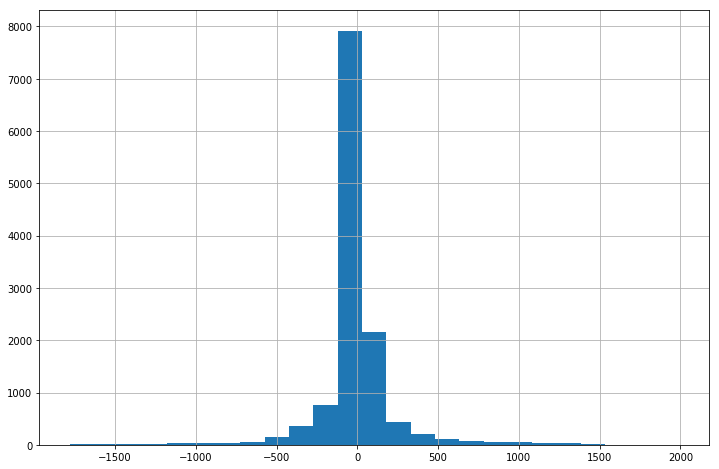

In [34]:
df_traj.Res_Bx2.hist(bins=25)

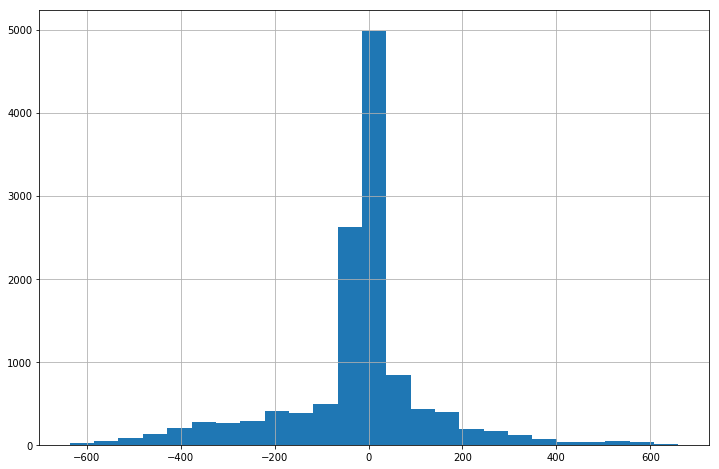

In [75]:
df_traj.Res_Bx.hist(bins=25)

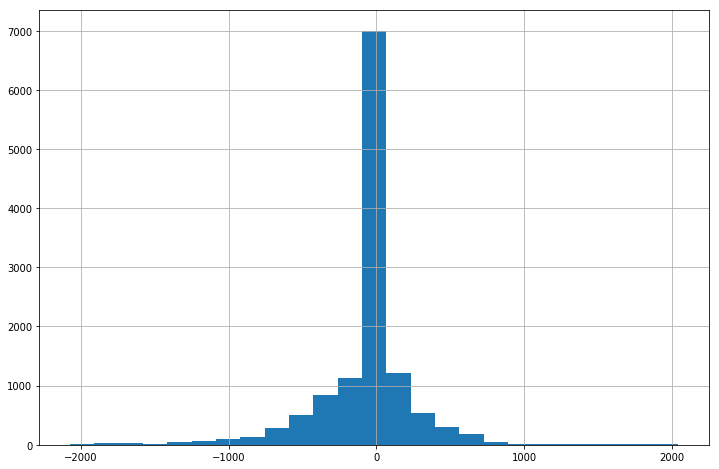

In [35]:
df_traj.Res_By2.hist(bins=25)

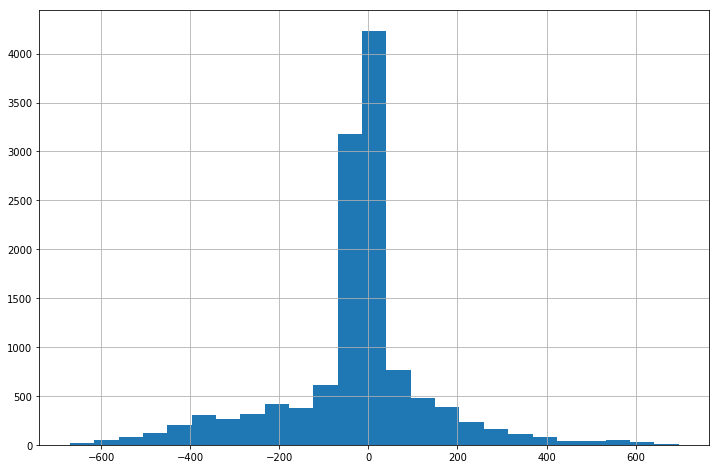

In [76]:
df_traj.Res_By.hist(bins=25)

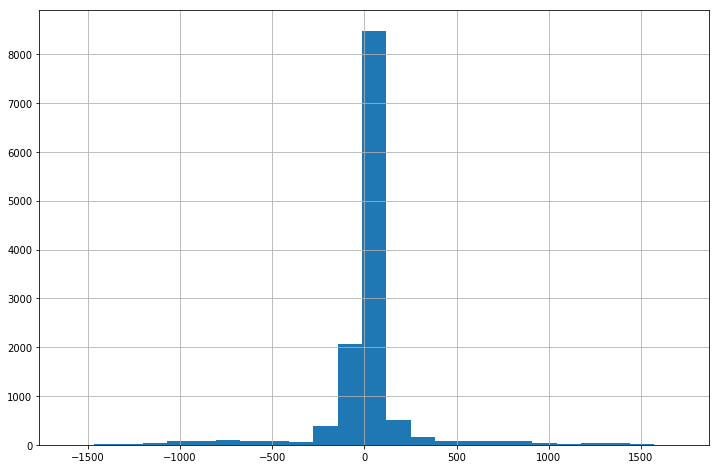

In [36]:
df_traj.Res_Bz2.hist(bins=25)

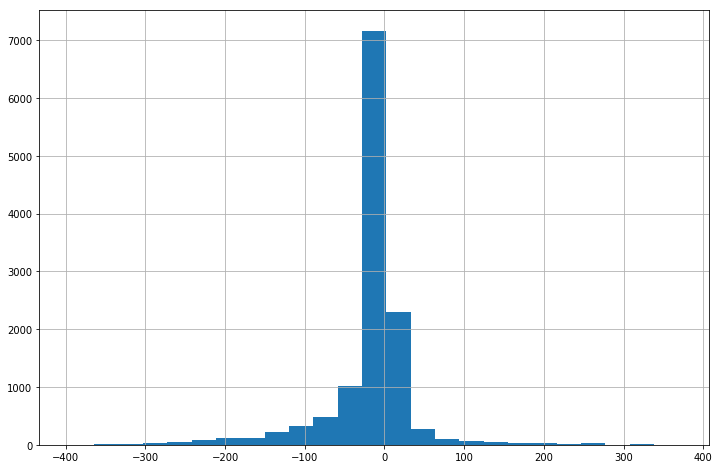

In [77]:
df_traj.Res_Bz.hist(bins=25)

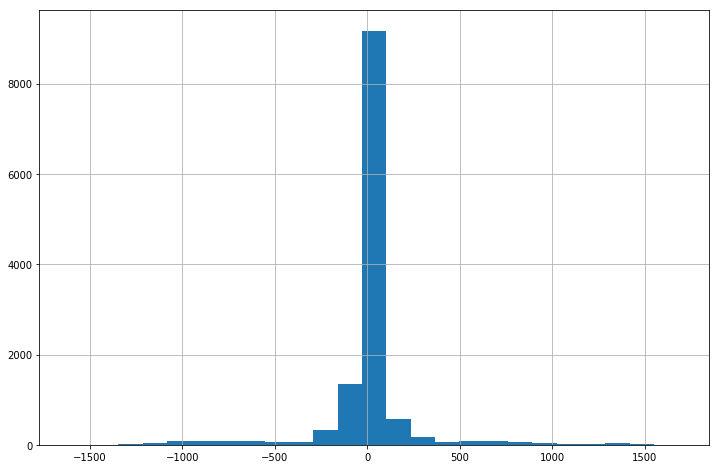

In [37]:
df_traj.Res_B_mag2.hist(bins=25)

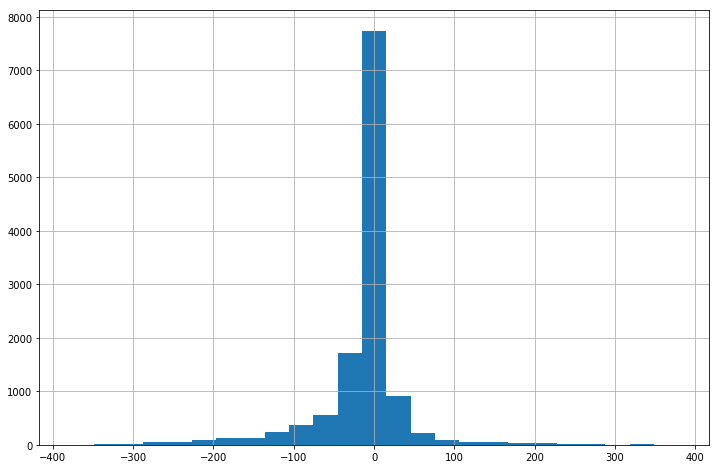

In [78]:
df_traj.Res_B_mag.hist(bins=25)
#plt.yscale('log')

In [41]:
N = 100000
%time mag_full_reco_func(df_ds.R[:N],df_ds.Phi[:N],df_ds.Z[:N],cart=False)

CPU times: user 2 s, sys: 30.1 ms, total: 2.03 s
Wall time: 279 ms


(array([    40.9564047 ,     44.43808061,     46.0638469 , ...,
        -27771.71298299, -22923.86963878, -14751.47508316]),
 array([ 2.81278008e-02, -3.84958957e-03, -2.78138154e-02, ...,
         7.06092867e+01,  2.57532501e+02,  4.01295373e+02]),
 array([19525.81789217, 19441.57870144, 19358.63708494, ...,
        18419.43397726, 28747.78051615, 36416.85470945]))

In [42]:
br, bphi, bz = mag_full_reco_func(df_ds.R,df_ds.Phi,df_ds.Z,cart=False)

In [84]:
br

array([  -4438.67698324,   -5678.76269106,   -6672.04291824, ...,
       1327164.87686894, 1764601.85167198, 2162349.58677759])

In [62]:
bx, by, bz = mag_full_reco_func(df_ds.X,df_ds.Y,df_ds.Z,cart=True)

In [63]:
bx2, by2, bz2 = mag_full_reco_func(df_ds.X,df_ds.Y,df_ds.Z,cart=True)

In [171]:
df_ds_s = df_ds.sample(600000)
#df_ds_s = df_ds[df_ds.R <= 0.1]

In [165]:
#df_ds_s

In [172]:
bx, by, bz = mag_full_reco_func(df_ds_s.X,df_ds_s.Y,df_ds_s.Z,cart=True)

In [173]:
bx2, by2, bz2 = mag_full_reco_func(df_ds_s.X,df_ds_s.Y,df_ds_s.Z,cart=True)

In [174]:
np.max(bx - bx2)

0.0

In [175]:
np.max(by - by2)

0.0

In [176]:
np.max(bz - bz2)

0.0

AttributeError: 'numpy.ndarray' object has no attribute 'isinf'

In [43]:
df_ds['Bx_fit'] = bx
df_ds['By_fit'] = by
df_ds['Bz_fit'] = bz

In [44]:
df_ds.eval("B_mag = (Bx**2 + By**2 + Bz**2)**(1/2)",inplace=True)
df_ds.eval("B_mag_fit = (Bx_fit**2 + By_fit**2 + Bz_fit**2)**(1/2)",inplace=True)

df_ds.eval("Res_Bx = Bx-Bx_fit",inplace=True)
df_ds.eval("Res_By = Bx-By_fit",inplace=True)
df_ds.eval("Res_Bz = Bz-Bz_fit",inplace=True)
df_ds.eval("Res_B_mag = B_mag-B_mag_fit",inplace=True)

IndexError: index -9223372036854775808 is out of bounds for axis 1 with size 51

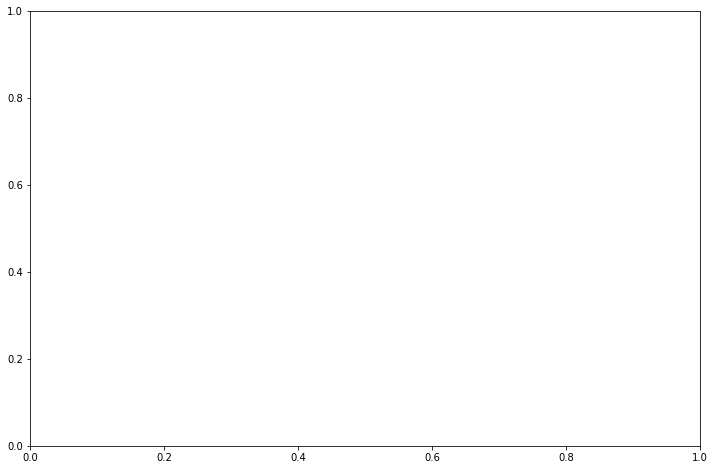

In [53]:
df_ds[df_ds.notna()].Res_Bx.hist(bins=50)

IndexError: index -9223372036854775808 is out of bounds for axis 1 with size 26

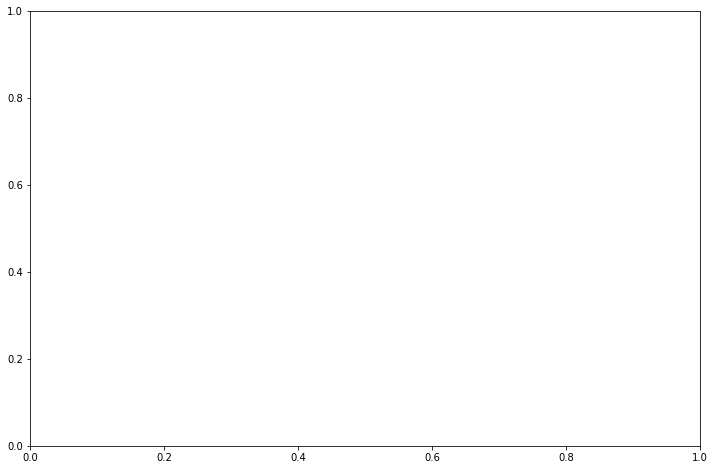

In [54]:
df_ds[df_ds.notna()].Res_By.hist(bins=25)

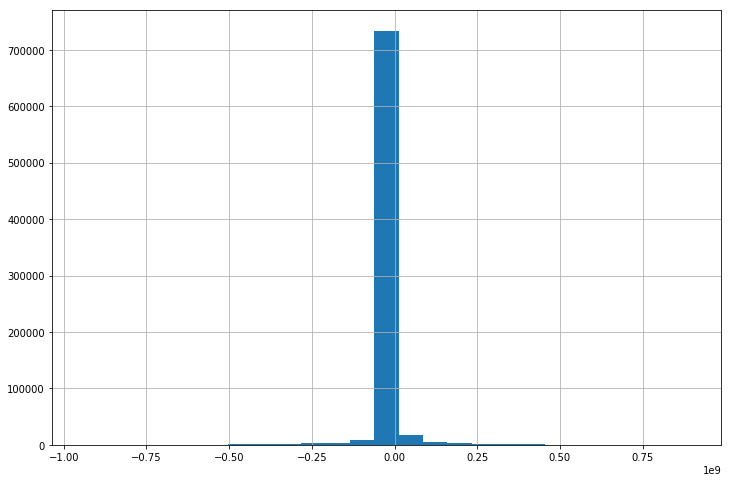

In [55]:
df_ds[df_ds.notna()].Res_Bz.hist(bins=25)

ValueError: supplied range of [-inf, 19084.591130048877] is not finite

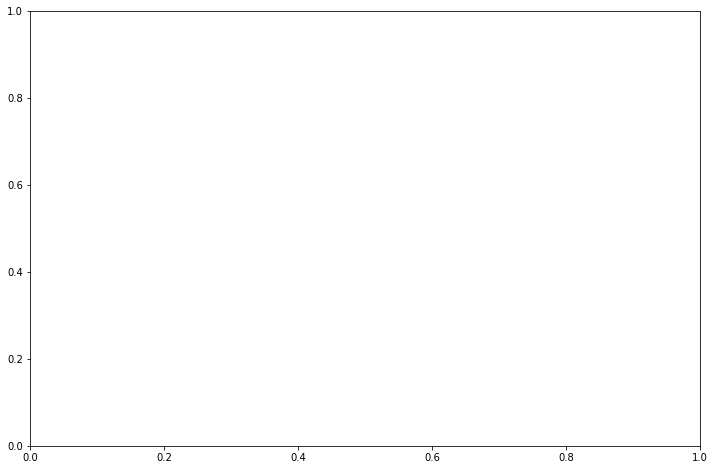

In [56]:
df_ds[df_ds.notna()].Res_B_mag.hist(bins=25)